In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import glob
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from mpl_toolkits.axes_grid1.colorbar import colorbar

sns.set_palette('colorblind')
sns.set_context('notebook')
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('axes',labelsize=20) 


In [17]:
df = pd.read_csv('/home/oliver/PhD/Gaia_Project/data/KepxDR2/rcxyu18.csv')
df.head(1)

,KICID,kepmag_x,Length_Quarters,Length_days,numax,numax_err,dnu,dnu_err,amplitude,err.2_x,...,BC_GBP,BC_GRP,BC_J,BC_H,BC_K,ast_MKs,ast_MH,ast_MJ,ast_MG,ast_M_err
0,892760,13.23,6,380.8,29.48,0.48,3.962,0.116,149.7,8.3,...,-0.74,0.388,1.206,1.638,1.766,-1.671234,-1.543234,-1.111234,0.343766,0.206767


In [18]:
def read_paramdict(majorlabel, minorlabel='', sort='astero'):
    '''Reads in results for either:
        -A full run series (majorlabel) where the minorlabel is included as a
            column in the output.
        -A single run (majorlabel and minorlabel).

        Returns a pandas dataframe.
    '''
    loc = __outdir__+majorlabel+'/'

    if minorlabel != '':
        globlist = glob.glob(loc+sort+'_'+str(float(minorlabel))+'_*pars*.csv')
    else:
        globlist = glob.glob(loc+sort+'*_*pars*.csv')

    minorlabels = [os.path.basename(globloc).split('_')[1] for globloc in globlist]

    df = pd.DataFrame()
    for n, globloc in enumerate(globlist):
        sdf = pd.read_csv(globloc, index_col = 0)
        if minorlabels[n] != 'pars.csv':
            sdf[majorlabel] = minorlabels[n]
        df = df.append(sdf)

    return df.sort_values(by=majorlabel)
__outdir__ = os.path.expanduser('~')+'/PhD/Gaia_Project/Output/'

In [19]:
knoc = read_paramdict('K_tempscale_noCorrection')
krc = read_paramdict('K_tempscale_Clump')
knoc['tempscale'] = knoc['K_tempscale_noCorrection'].str.strip()
knoc['tempscale'] = knoc.tempscale.astype(float)
krc['tempscale'] = krc['K_tempscale_Clump'].str.strip()
krc['tempscale'] = krc.tempscale.astype(float)

## Regular Plot

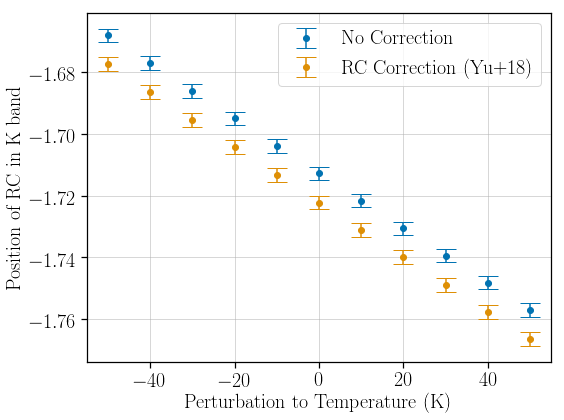

In [25]:
fig = plt.figure(figsize=(8,6))

(_, caps1,_) = plt.errorbar(knoc.tempscale, knoc.mu, yerr = knoc.mu_std, fmt='o', capsize=10, label='No Correction')
(_, caps2,_) = plt.errorbar(krc.tempscale, krc.mu, yerr = krc.mu_std, fmt='o',  capsize=10,label='RC Correction (Yu+18)')
for cap1, cap2 in zip(caps1, caps2):
    cap1.set_markeredgewidth(1)
    cap2.set_markeredgewidth(1)
plt.grid(alpha=.5)
plt.xlabel('Perturbation to Temperature (K)')
plt.ylabel('Position of RC in K band')
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()

## Violin Plot

In [21]:
t = np.array([])
t = np.append(t, ['test']*5)
t

array(['test', 'test', 'test', 'test', 'test'], dtype='|S32')

In [33]:
mlnc = 'K_tempscale_noCorrection'
mlrc = 'K_tempscale_Clump'
kind = 'astero'
chains = np.array([])
tempscales = np.array([])
ncrc = np.array([])

for ts in knoc.tempscale.values[:5]:
    minorlabel = str(ts)
    #Add NC chains & labels
    chain = np.genfromtxt(__outdir__+mlnc+'/'+kind+'_'+minorlabel+'_chains.txt')[0]
    chains = np.append(chains, chain)
    tempscales = np.append(tempscales, np.ones(len(chain))*ts)
    ncrc = np.append(ncrc, ['No Correction']*len(chain))
    
    #Add RC chains & labels
    chain = np.genfromtxt(__outdir__+mlrc+'/'+kind+'_'+minorlabel+'_chains.txt')[0]
    chains = np.append(chains, chain)
    tempscales = np.append(tempscales, np.ones(len(chain))*ts)
    ncrc = np.append(ncrc, ['Clump Corrected']*len(chain))

music = pd.DataFrame()
music['chains'] = chains
music['tempscales'] = tempscales
music['ncrc'] = ncrc

[None, None, None, None]

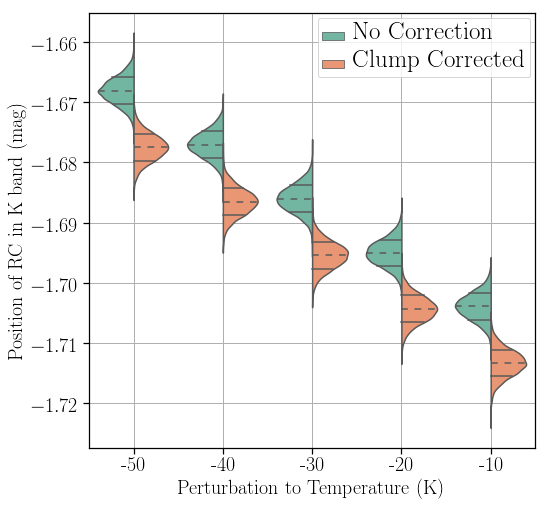

In [34]:
fig = plt.figure(figsize=(8,8))
ax = sns.violinplot(music.tempscales.astype(int).values, music.chains.values, hue=music.ncrc.values,
                   palette='Set2', split=True, inner='quartile')
ax.grid()
ax.set_axisbelow(True)
ax.set(xlabel='Perturbation to Temperature (K)', ylabel='Position of RC in K band (mag)')
plt.setp(ax.get_legend().get_texts(), fontsize='25')